In [1]:
# --- Now, a concrete implementation using ASE ---
import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms
from ase.calculators.lj import LennardJones
calc = LennardJones(sigma=1, epsilon=1, rc=3, smooth=False)

def lj2(r):
    atoms = Atoms('X2', [[0,0,0],[r,0,0]])
    atoms.calc = calc
    return atoms.get_total_energy(), atoms.get_forces()

In [2]:
lj2(3)[1].flatten()

array([ 0.01094383,  0.        ,  0.        , -0.01094383,  0.        ,
        0.        ])

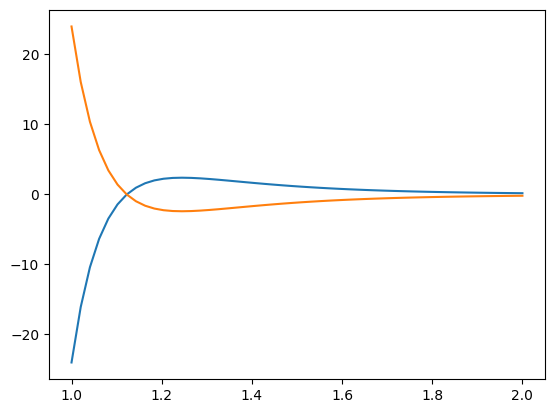

In [3]:
x = np.linspace(1,2)
y = np.array([np.dot(lj2(val)[1], [1,0,0]) for val in x])
plt.plot(x,y)

In [4]:
# Test with LJ cluster
from optimizers import ScipyOptimizer, ASEOptimizer
from potentials import LennardJonesCluster
from ca_abc import CurvatureAdaptiveABC
import numpy as np

np.random.seed(42)

mypot = LennardJonesCluster(2)
myabc = CurvatureAdaptiveABC(mypot)

# Add more robust configuration
myopt = ScipyOptimizer(myabc, method="L-BFGS-B")
myopt=ASEOptimizer(myabc, 'FIRE')

# Ensure proper starting position
x0 = mypot.default_starting_position().astype(np.float64)

# Run with safeguards
result = myopt.descend(x0, max_steps=100, convergence_threshold=1e-5)
print(result)

      Step     Time          Energy          fmax
FIRE:    0 08:24:16       -0.434781        1.581366
FIRE:    1 08:24:16       -0.434781        1.581366
FIRE:    2 08:24:16       -0.434781        1.581366
FIRE:    3 08:24:16       -0.434781        1.581366
FIRE:    4 08:24:16       -0.434781        1.581366
FIRE:    5 08:24:16       -0.434781        1.581366
FIRE:    6 08:24:16       -0.434781        1.581366
FIRE:    7 08:24:16       -0.434781        1.581366
FIRE:    8 08:24:16       -0.434781        1.581366
FIRE:    9 08:24:16       -0.434781        1.581366
FIRE:   10 08:24:16       -0.434781        1.581366
FIRE:   11 08:24:16       -0.434781        1.581366
FIRE:   12 08:24:16       -0.434781        1.581366
FIRE:   13 08:24:16       -0.434781        1.581366
FIRE:   14 08:24:16       -0.434781        1.581366
FIRE:   15 08:24:16       -0.434781        1.581366
FIRE:   16 08:24:16       -0.434781        1.581366
FIRE:   17 08:24:16       -0.434781        1.581366
FIRE:   18 08:

In [5]:
from ca_abc import CurvatureAdaptiveABC
from potentials import *
from optimizers import *
mypot = Complex1D()
mypot = StandardMullerBrown2D()
myabc = CurvatureAdaptiveABC(mypot)

myopt = ScipyOptimizer(myabc, method="BFGS")


result = myopt.descend([0, 0], 20, 1e-5)
result

remove_rotation_translation=True is incompatible with potentials without 3N cartesian dimensions; setting to False.


({'x': array([0.62349941, 0.02803776]),
  'converged': True,
  'nit': 7,
  'message': 'Optimization terminated successfully.',
  'hess_inv': array([[ 1.83919501e-03, -9.14731203e-05],
         [-9.14731203e-05,  3.40357931e-04]])},
 {'trajectory': [array([0., 0.]),
   array([0.23007699, 0.20781567]),
   array([0.59616943, 0.03292627]),
   array([0.61459307, 0.02528581]),
   array([0.62263251, 0.02840701]),
   array([0.62354634, 0.02801991]),
   array([0.6234993 , 0.02803778])],
  'unbiased_energies': [np.float64(-48.40127417318389),
   np.float64(-74.76537570406889),
   np.float64(-107.95138334722715),
   np.float64(-108.12988163425165),
   np.float64(-108.1663619034848),
   np.float64(-108.16672315956717),
   np.float64(-108.16672411684873)],
  'biased_energies': [np.float64(-48.40127417318389),
   np.float64(-74.76537570406889),
   np.float64(-107.95138334722715),
   np.float64(-108.12988163425165),
   np.float64(-108.1663619034848),
   np.float64(-108.16672315956717),
   np.float64(

In [6]:
from potentials import *
from optimizers import *

from scipy.optimize import minimize
import numpy as np

mypot = StandardMullerBrown2D().potential
mygrad = StandardMullerBrown2D().gradient

options = {'gtol':1e-5}

minimize(fun=mypot, x0=(10,0), 
         jac=lambda x: mygrad(x), 
         method="BFGS", options=options)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -21.907253352784583
        x: [-1.638e-01  7.807e-01]
      nit: 105
      jac: [ 1.122e+01  2.522e+02]
 hess_inv: [[ 1.005e-02 -4.472e-04]
            [-4.472e-04  1.989e-05]]
     nfev: 126
     njev: 122

In [7]:
from ca_abc import CurvatureAdaptiveABC
myabc = CurvatureAdaptiveABC(StandardMullerBrown2D(), max_descent_steps=1000, max_acceptable_force_mag=1e99)
myopt = ScipyOptimizer(myabc, method="BFGS") 

myabc.optimizer = myopt

myabc.position = np.array([12,0])

myabc.descend(1e3, 1e-5)

remove_rotation_translation=True is incompatible with potentials without 3N cartesian dimensions; setting to False.


True

In [8]:
new_pos = result[1]['trajectory'][-1]

In [9]:
myopt.descend(new_pos, convergence_threshold=1e-5)

({'x': array([0.62349941, 0.02803776]),
  'converged': True,
  'nit': 2,
  'message': 'Optimization terminated successfully.',
  'hess_inv': array([[1.59961198, 0.25875524],
         [0.25875524, 0.04227402]])},
 {'trajectory': [array([0.6234993 , 0.02803778])],
  'unbiased_energies': [np.float64(-108.16672411684873)],
  'biased_energies': [np.float64(-108.16672411684873)],
  'unbiased_forces': [array([ 5.65387565e-05, -5.11069408e-05])],
  'biased_forces': [array([ 5.65387565e-05, -5.11069408e-05])]})

In [18]:
from potentials import *
from optimizers import *

from scipy.optimize import minimize
import numpy as np

np.random.seed(10)

lj = LennardJonesCluster(num_atoms=8)

myabc = CurvatureAdaptiveABC(lj)

options = {'gtol':1e-5}

minimize(fun=myabc.compute_biased_potential, x0=lj.default_starting_position(), 
         jac=lambda x: -myabc.compute_biased_force(x), 
         method="BFGS", options=options)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -19.818243595412888
        x: [-1.647e-01  3.228e-01 ...  1.753e+00  8.011e-02]
      nit: 75
      jac: [ 4.218e-07 -1.105e-06 ... -6.101e-06 -2.571e-06]
 hess_inv: [[ 1.762e-01 -1.274e-02 ... -1.249e-02  4.924e-03]
            [-1.274e-02  2.018e-01 ...  1.377e-01  3.349e-03]
            ...
            [-1.249e-02  1.377e-01 ...  1.408e-01 -1.473e-02]
            [ 4.924e-03  3.349e-03 ... -1.473e-02  1.694e-01]]
     nfev: 93
     njev: 93